# Project: Wrangling and Analyze Data

In [1]:
#required packages
import pandas as pd
import requests
import os

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#read and preview the twitter archive data provided
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1850,675740360753160193,NaN,NaN,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675740360...,12,10,None,None,None,pupper,None
1409,699060279947165696,NaN,NaN,2016-02-15 02:38:53 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Yukon. He pukes rainbows. 12/10 magica...,NaN,NaN,NaN,https://vine.co/v/inlmMHxtqDD,12,10,Yukon,None,None,None,None
1893,674752233200820224,NaN,NaN,2015-12-10 00:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everyone please just appreciate how perfect th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674752233...,12,10,None,None,None,None,None
1518,690932576555528194,NaN,NaN,2016-01-23 16:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's testing out the water. Suc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690932576...,12,10,Buddy,None,None,None,None
452,818614493328580609,NaN,NaN,2017-01-10 00:24:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bear. He's a passionate believer of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818614493...,12,10,Bear,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
image_predict_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predict_url)

with open (image_predict_url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    


In [4]:
images_data = pd.read_csv('image-predictions.tsv', sep='\t')
images_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [21]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
#Read json file into a pandas dataframe

import json 

temp = []

with open('tweet_json.txt', encoding='utf-8') as json_file:
    for i in json_file:
        data = json.loads(i)
        tweet_id = data['id']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count'] 
    
        temp.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_count': retweet_count})

# create a new DataFrame 
tweet_json = pd.DataFrame(temp, columns = ['tweet_id', 'favorite_count','retweet_count'])
                                          

tweet_json.to_csv('tweet_json_1.txt', index=False)

In [6]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.




..

> Print the general info about the twitter_archive dataframe to know the columns, datatypes and size of the dataframe.

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> Print a random sample of 10 rows from the twitter_archive dataframe. This allows me scroll through to get a feel of the data.

In [8]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2028,671866342182637568,NaN,NaN,2015-12-02 01:39:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671866342...,10,10,Dylan,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
288,838476387338051585,NaN,NaN,2017-03-05 19:48:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Somehow he heard you tell him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838476387...,13,10,Stanley,None,None,None,None
1030,745433870967832576,NaN,NaN,2016-06-22 01:50:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenox. She's in a wheelbarrow. Silly d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745433870...,10,10,Lenox,doggo,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
2254,667782464991965184,NaN,NaN,2015-11-20 19:12:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog. Endangered (?). Thinks it's fu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667782464...,9,10,None,None,None,None,None
2122,670403879788544000,NaN,NaN,2015-11-28 00:48:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670403879...,10,10,Nigel,None,None,None,None
1301,707629649552134146,NaN,NaN,2016-03-09 18:10:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate marshmallows but this on...,NaN,NaN,NaN,https://vine.co/v/iHhBOTl5p9z,10,10,None,None,None,None,None


> Find out how many rows contain a null value in the 'in_reply_to_satus_id'

In [9]:
twitter_archive[twitter_archive['in_reply_to_status_id'].isnull()]
#len(twitter_archive[twitter_archive['in_reply_to_status_id'].isnull()])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


> Find out how many rows contain 'None' under the column 'name'

In [10]:
twitter_archive[twitter_archive['name']=='None'].count()

tweet_id                      745
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     745
source                        745
text                          745
retweeted_status_id            65
retweeted_status_user_id       65
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

> 5. Describe the twitter_archive dataframe.

In [11]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> Find duplicated rows

In [12]:
twitter_archive.duplicated().sum()

0

> Print a random sample of 10 rows from the tweet_json dataframe

In [13]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count
577,800751577355128832,11701,3214
73,878316110768087041,0,6965
528,808344865868283904,47281,24069
1195,717009362452090881,3583,1102
1162,723179728551723008,5761,2110
474,816062466425819140,0,1207
2299,667044094246576128,198,54
1297,707738799544082433,4495,2785
944,752568224206688256,6140,2605
848,765719909049503744,8021,2475


> Get general information about the tweet_json dataframe

In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


> Describe the tweet_json dataframe

In [15]:
tweet_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


> Find duplicated rows

In [16]:
tweet_json.duplicated().sum()

0

> Print a sample of 10 rows from the images_data dataframe, then print out general information, describe the dataframe and check for duplicates

In [17]:
images_data.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1257,748575535303884801,https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,1,muzzle,0.176172,False,seat_belt,0.160953,False,soft-coated_wheaten_terrier,0.086499,True
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
1079,717841801130979328,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
1215,743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,sea_lion,0.859046,False,tub,0.020405,False,hippopotamus,0.013095,False
445,674646392044941312,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False
565,678278586130948096,https://pbs.twimg.com/media/CWm6xySUEAAqfFU.jpg,1,Maltese_dog,0.897841,True,Lhasa,0.035717,True,Tibetan_terrier,0.017107,True
840,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,beaver,0.457094,False,mongoose,0.228298,False,marmot,0.148309,False
891,699370870310113280,https://pbs.twimg.com/media/CbSqE0rVIAEOPE4.jpg,1,cairn,0.337557,True,Chihuahua,0.209130,True,Border_terrier,0.136946,True


In [18]:
images_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
images_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
images_data.duplicated().sum()

0

### Quality issues

I identified the following quality issues in the data

1. Wrong datatype (integer to strings)
2. Wrong datatype (timestamp)
3. Irrelevant rows
4. Irrelevant columns
5. Incorrect dog names
6. Incorrect ratings
7. Some images do not belong to dogs
8. Inconsistent dog breed names



### Tidiness issues
#### Twitter Archive Data
1.Doggo, floofer, pupper, puppo columns should be in one column (dog type)

2.Twitter archive and tweet json tables should be one

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
t_archive = twitter_archive.copy()
images = images_data.copy()
t_json = tweet_json.copy()

### Quality Issues

### Issue #1: Wrong Datatype (Twitter ID should be a string)

#### Define

Change Tweet ID datatype to object in both twitter_archive, images and tweet_json dataframes.

#### Code

In [22]:
t_json.tweet_id = t_json.tweet_id.astype('object')
images.tweet_id = images.tweet_id.astype('object')
t_archive.tweet_id = t_archive.tweet_id.astype('object')

#### Test

In [23]:
#t_archive.info()
images.info()
#tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #2: Wrong Datatype (Time stamp should have a date-time datatype)

#### Define:
Convert Timestamp datatype to datetime

#### Code

In [24]:
#convert timestamp to datetime
t_archive['timestamp'] = pd.to_datetime(t_archive['timestamp'])

#### Test

In [25]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue #3: Irrelevant Rows

#### Define
Drop rows with retweet data

I have decided to drop rows with retweet data since they are just duplicates of the original tweets.

#### Code

In [26]:
row_index = t_archive[(t_archive.retweeted_status_id.notnull())].index

t_archive.drop(row_index, axis = 0, inplace = True)

#### Test

In [27]:
t_archive[t_archive['retweeted_status_id'].notnull()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

### Issue #4: Irrelevant Columns

#### Define

Drop uneccessary columns in each dataframe.

T_archive dataframe (source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_id, retweeted_status_user_id, expanded_urls)

Tweet_json dataframe (p1:prediction, p1_conf:prediction_confidence)

#### Code

In [28]:
drop_col1 = ['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp', 'retweeted_status_id', 'retweeted_status_user_id', 'expanded_urls']
drop_col2 = ['jpg_url', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


t_archive = t_archive.drop(drop_col1, axis = 1)
images = images.drop(drop_col2, axis = 1)

images = images.rename(columns = {'p1':'dog_breed', 'p1_conf':'prediction_confidence'})


#### Test

In [29]:
list(t_archive)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [30]:
list(images)

['tweet_id', 'img_num', 'dog_breed', 'prediction_confidence', 'p1_dog']

### Issue #5: Incorrect Dog names

#### Define:

Replace Incorrect dog names with null
- Replace 'None' with null
- Replace dog names with lower characters (they are invalid as well) as shown below

In [31]:
t_archive[t_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               6
very             4
one              4
just             3
quite            3
getting          2
not              2
actually         2
life             1
light            1
infuriating      1
incredibly       1
old              1
all              1
by               1
unacceptable     1
mad              1
my               1
space            1
his              1
officially       1
such             1
this             1
Name: name, dtype: int64

#### Code

In [32]:
rep_names = t_archive[t_archive.name.str.islower()].name.unique()

t_archive['name'] = t_archive['name'].replace(dict.fromkeys(rep_names, ''))
t_archive.name = t_archive.name.replace('None','')


#### Test

In [33]:
t_archive.name.value_counts()

                784
Lucy             11
Charlie          11
Cooper           10
Oliver           10
Tucker            9
Penny             9
Lola              8
Winston           8
Sadie             8
Daisy             7
Toby              7
Oscar             6
Stanley           6
Bo                6
Bella             6
Bailey            6
Koda              6
Jax               6
Milo              5
Dave              5
Scout             5
Leo               5
Rusty             5
Louis             5
Bentley           5
Chester           5
Buddy             5
Cassie            4
Clark             4
               ... 
Emanuel           1
Bruno             1
Carll             1
Andru             1
Antony            1
Timmy             1
Deacon            1
Fillup            1
Lulu              1
Pherb             1
Cleopatricia      1
DayZ              1
Sora              1
Brian             1
Taco              1
Brockly           1
Tilly             1
Jareld            1
Quinn             1


In [34]:
t_archive[t_archive.name.str.islower()].name.value_counts()

Series([], Name: name, dtype: int64)

### Issue #6: Incorrect ratings

#### Define
Find and update incorrect ratings

In [35]:
t_archive.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
653,792050063153438720,2016-10-28 17:07:05,This is Remus. He's a mop that came to life. C...,11,10,Remus,None,None,None,None
703,785927819176054784,2016-10-11 19:39:28,This is Lucy. She's strives to be the best pot...,12,10,Lucy,None,None,None,None
2175,669214165781868544,2015-11-24 18:01:05,This is Jaspers. He is a northeastern Gillette...,10,10,Jaspers,None,None,None,None
525,809084759137812480,2016-12-14 17:16:53,This is Wallace. You said you brushed your tee...,11,10,Wallace,None,None,None,None
672,789903600034189313,2016-10-22 18:57:48,This is Ralphy. His dreams were just shattered...,13,10,Ralphy,None,None,pupper,None


#### Code

In [36]:
#View tweets with a rating_denominator not equal to 10
#t_archive[t_archive['rating_denominator'] !=10 ]

pd.set_option("display.max_colwidth", -1)
t_archive[t_archive['rating_denominator']!=10] [['tweet_id','text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [37]:
# change
#tweet id 835246439529840640 num to 13 and den to 10
#tweet id 832088576586297345 num and den to null
#tweet id 810984652412424192 num and den to null
#tweet id 740373189193256964 num to 14 and den to 10
#tweet id 722974582966214656 num to 13 and den to 10
#tweet id 716439118184652801 num to 11 and den to 10
#tweet id 682962037429899265 num to 10 and den to 10
#tweet id 666287406224695296 num to 9 and den to 10

# I understand that this is a manual process but I couldn't think of any other way

t_archive.loc[t_archive['tweet_id'] == 835246439529840640, ('rating_numerator','rating_denominator')] = (13,10)
t_archive.loc[t_archive['tweet_id'] == 832088576586297345, ('rating_numerator','rating_denominator')] = ('','')
t_archive.loc[t_archive['tweet_id'] == 810984652412424192, ('rating_numerator','rating_denominator')] = ('','')
t_archive.loc[t_archive['tweet_id'] == 740373189193256964, ('rating_numerator','rating_denominator')] = (14,10)
t_archive.loc[t_archive['tweet_id'] == 722974582966214656, ('rating_numerator','rating_denominator')] = (13,10)
t_archive.loc[t_archive['tweet_id'] == 716439118184652801, ('rating_numerator','rating_denominator')] = (11,10)
t_archive.loc[t_archive['tweet_id'] == 682962037429899265, ('rating_numerator','rating_denominator')] = (10,10)
t_archive.loc[t_archive['tweet_id'] == 666287406224695296, ('rating_numerator','rating_denominator')] = (9,10)







#### Test

In [38]:
pd.set_option("display.max_colwidth", -1)
t_archive[t_archive['rating_denominator']!=10] [['tweet_id','text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,,
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,,
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40


### Issue #7: Some Images do not belong to dogs

In [39]:
images.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

#### Define

Drop all rows whose p1_dog value is false

#### Code

In [40]:
images = images[images.p1_dog]

#### Test

In [41]:
images.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

### Issue #8: Inconsistent Dog Breed Names

#### Define

Change the format of dog breeds to lowercase, and replace hyphens with underscore to keep them consistent.

#### Code

In [42]:
#apply the lower() method to column dog_breed
images['dog_breed'] = images['dog_breed'].str.lower()
images.dog_breed = images.dog_breed.replace('-','')

#### Test

In [43]:
images.dog_breed.value_counts()

golden_retriever               150
labrador_retriever             100
pembroke                       89 
chihuahua                      83 
pug                            57 
chow                           44 
samoyed                        43 
toy_poodle                     39 
pomeranian                     38 
malamute                       30 
cocker_spaniel                 30 
french_bulldog                 26 
miniature_pinscher             23 
chesapeake_bay_retriever       23 
german_shepherd                20 
staffordshire_bullterrier      20 
siberian_husky                 20 
cardigan                       19 
eskimo_dog                     18 
shetland_sheepdog              18 
beagle                         18 
maltese_dog                    18 
rottweiler                     17 
lakeland_terrier               17 
shih-tzu                       17 
kuvasz                         16 
italian_greyhound              16 
west_highland_white_terrier    14 
great_pyrenees      

### Tidiness Issues

### Issue #1: Doggo, floofer, pupper, puppo columns should be in one column (dog type)

#### Define

Merge Doggo, floofer, pupper, puppo columns into one column and name it dog_type

#### Code

In [44]:
list(t_archive)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [45]:
t_archive.doggo.replace('None', '', inplace=True) 
t_archive.floofer.replace('None', '', inplace=True) 
t_archive.pupper.replace('None', '', inplace=True) 
t_archive.puppo.replace('None', '', inplace=True) 


t_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1831
1,,,,puppo,24
2,,,pupper,,224
3,,floofer,,,9
4,doggo,,,,75
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [46]:
#merge columns

t_archive['stage'] = t_archive.doggo + t_archive.floofer + t_archive.pupper + t_archive.puppo
t_archive.loc[t_archive.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
t_archive.loc[t_archive.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
t_archive.loc[t_archive.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [47]:
t_archive.stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [48]:
#drop unnessecary columns

too_drop = ['doggo', 'floofer', 'pupper', 'puppo']
t_archive = t_archive.drop(too_drop, axis=1)

#### Test

In [49]:
t_archive.head(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,,
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,,
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo


### Issue #2: Twitter archive and tweet json tables should be one

#### Define

OuterJoin the t_archive and t_json dataframes on tweet_id

#### Code

In [50]:
tweets_1 = pd.merge(t_archive, t_json, on = 'tweet_id', how = 'left')

tweets = pd.merge(tweets_1, images, on = 'tweet_id', how = 'left')

#### Test

In [51]:
tweets.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,img_num,dog_breed,prediction_confidence,p1_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,,39467,8853,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,,33819,6514,1.0,chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,,25461,4328,1.0,chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,,42908,8964,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,,41048,9774,2.0,basset,0.555712,True


#### Drop other irrelevant columns

In [52]:
drop_col_new = ['img_num', 'prediction_confidence', 'p1_dog']
tweets = tweets.drop(drop_col_new, axis=1)



In [53]:
tweets.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,,33819,6514,chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,,25461,4328,chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,,41048,9774,basset


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
tweets.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [55]:
#read data from csv file
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,33819,6514,chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,25461,4328,chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,NaN,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,41048,9774,basset


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  1391 non-null object
stage                 344 non-null object
favorite_count        2175 non-null int64
retweet_count         2175 non-null int64
dog_breed             1477 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 170.0+ KB


In [57]:
# convert tweet_date to date 
df['timestamp'] = df.timestamp.astype('datetime64')
#convert tweet_id to object
df['tweet_id'] = df.tweet_id.astype('object')

### The most popular breed dog

To find out the most popular breed of dog from this dataset, I will group the data by dog_breed and sort the resulting table in descending order. 

> This shows the most popular breed based on number of tweets about it is the  GOLDEN RETRIEVER

In [84]:
df.groupby('dog_breed').count().sort_values('tweet_id', ascending = False).head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
dog_breed,,,,,,,,,
golden_retriever,139,139,139,138,138,92,32,139,139
labrador_retriever,95,95,95,95,95,64,16,95,95
pembroke,88,88,88,88,88,64,13,88,88
chihuahua,79,79,79,79,79,59,7,79,79
pug,54,54,54,54,54,39,8,54,54


### The most loved breed of dogs based on the average number of likes or favourites given to tweets about them.

I will determinr this by grouping the data by dog_breed, obtain the mean favorite count, and sort the result based on this value.

> The result shows that the most loved breed by average likes is the SALUKI

In [59]:
df.groupby('dog_breed').mean().sort_values('favorite_count', ascending = False).head(5)

,rating_numerator,rating_denominator,favorite_count,retweet_count
dog_breed,,,,
saluki,12.500000,10.0,24060.000000,5133.750000
french_bulldog,11.269231,10.0,17913.000000,4683.923077
afghan_hound,9.666667,10.0,17326.666667,5976.000000
black-and-tan_coonhound,10.500000,10.0,17012.000000,4164.500000
flat-coated_retriever,10.875000,10.0,16791.625000,4520.250000


### The most loved breed of dogs based on the average rating recieved.

By grouping the data by dog breed and sorting the result by the rating numerator,

> The most loved breed of dog by ratings is the CLUMBER

In [60]:
df.groupby('dog_breed').mean().sort_values('rating_numerator', ascending = False).head(5)

,rating_numerator,rating_denominator,favorite_count,retweet_count
dog_breed,,,,
clumber,27.000000,10.000000,7320.000000,1885.000000
soft-coated_wheaten_terrier,25.454545,25.454545,2285.363636,813.000000
west_highland_white_terrier,15.642857,14.285714,6506.000000,1554.214286
great_pyrenees,14.928571,12.857143,12932.000000,4732.285714
borzoi,14.444444,14.444444,6217.444444,1936.444444


### Insights:
1.This shows the most popular breed based on number of tweets about it is the GOLDEN RETRIEVER

2.The result shows that the most loved breed by average likes is the SALUKI

3.The most loved breed of dog by ratings is the CLUMBER

### Visualization

In [61]:
import matplotlib.pyplot as plt

(0, 30000)

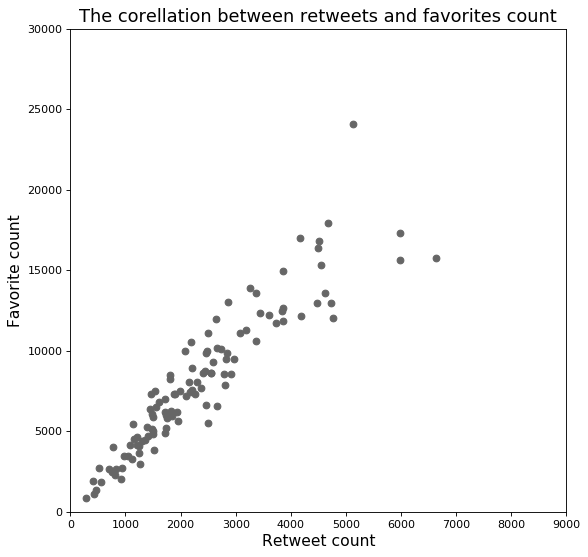

In [96]:
# getting the mean of retweet by breed dog 
high_retweet = df.groupby('dog_breed').retweet_count.mean()

# getting the mean of favorite by breed dog 
high_favorite = df.groupby('dog_breed').favorite_count.mean()

# set up the figure size of plotting 
plt.figure(figsize=(8, 8), dpi=80)

#plotting the scatter chart of two variables
plt.scatter(x=high_retweet, y=high_favorite, color=['0.4'])

plt.title('The corellation between retweets and favorites count', fontsize = 16)
plt.xlabel('Retweet count', fontsize = 14)
plt.ylabel('Favorite count', fontsize = 14)
plt.xlim(0, 9000) # limiting the X axis on 9000 
plt.ylim(0, 30000) # limiting the  axis on 30000 


In [87]:
len(df[df['dog_breed'].isnull()])

698

(0, 150)

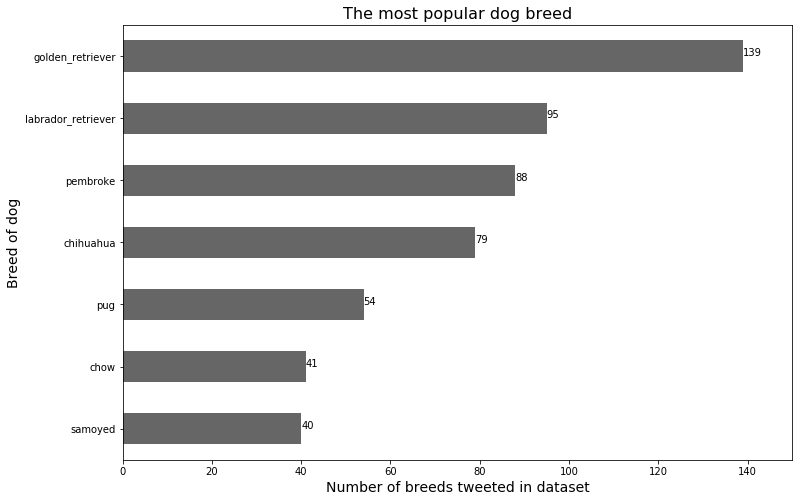

In [94]:
# grouping by dog_breed column 
popular_breed = df.groupby('dog_breed').filter(lambda x: len(x) >= 40)

# plotting the value of most popular dog breed in ascending order
count_breed = popular_breed.dog_breed.value_counts(ascending = True)
count_breed.plot(kind = 'barh', figsize = [12, 8], color=['0.4'])

#display values for each bar
for index, value in enumerate(count_breed):
    plt.text(value, index, str(value))
    
plt.title('The most popular dog breed', fontsize = 16)
plt.xlabel('Number of breeds tweeted in dataset', fontsize = 14)
plt.ylabel('Breed of dog', fontsize = 14)
plt.xlim(0, 150) # limiting the X axis on 175 



In [107]:
df.groupby('stage').tweet_id.count()

stage
doggo             75 
doggo, floofer    1  
doggo, pupper     10 
doggo, puppo      1  
floofer           9  
pupper            224
puppo             24 
Name: tweet_id, dtype: int64

(0, 250)

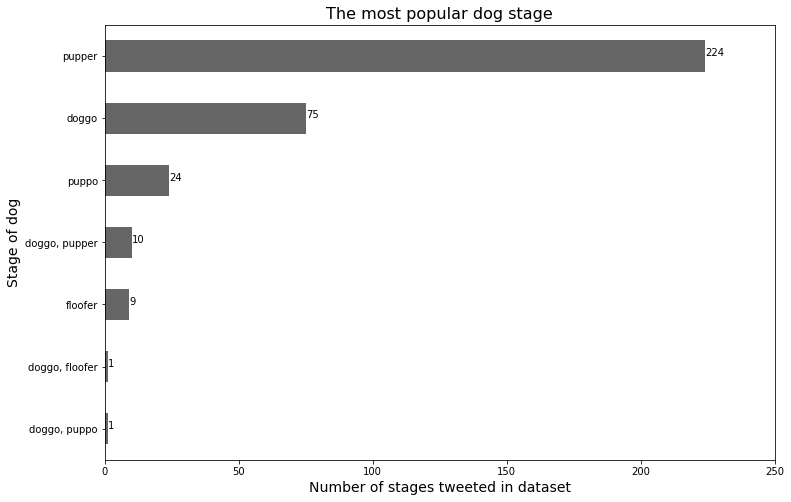

In [116]:
df_stage = df.replace('', 0)
df_stage = df.groupby(['stage']).sum()
count_stage = df.stage.value_counts(ascending = True)

count_stage.plot(kind='barh', figsize = [12, 8], color=['0.4'])

#display values for each bar
for index, value in enumerate(count_stage):
    plt.text(value, index, str(value))

plt.title('The most popular dog stage', fontsize = 16)
plt.xlabel('Number of stages tweeted in dataset', fontsize = 14)
plt.ylabel('Stage of dog', fontsize = 14)
plt.xlim(0, 250) # limiting the X axis on 175 


### Sources

Whenever I got stuck, i searched for answers from the following sources.
1. https://stackoverflow.com/questions/40313727/bar-graph-from-dataframe-groupby
2. https://pandas.pydata.org/docs/reference/api
3. https://github.com/Swatichanchal/Wrangle-and-Analyze-Data/blob/master/4.%20WRANGLE%20ANALYZE/wrangle_act.ipynb